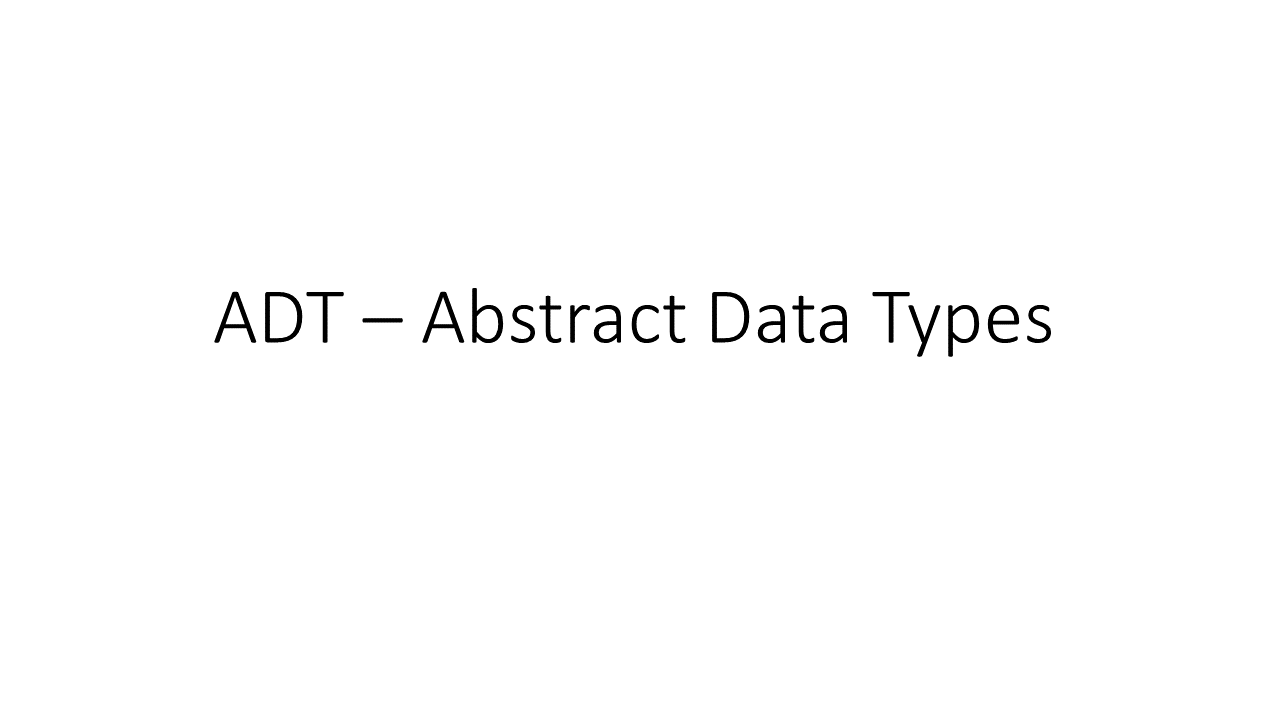

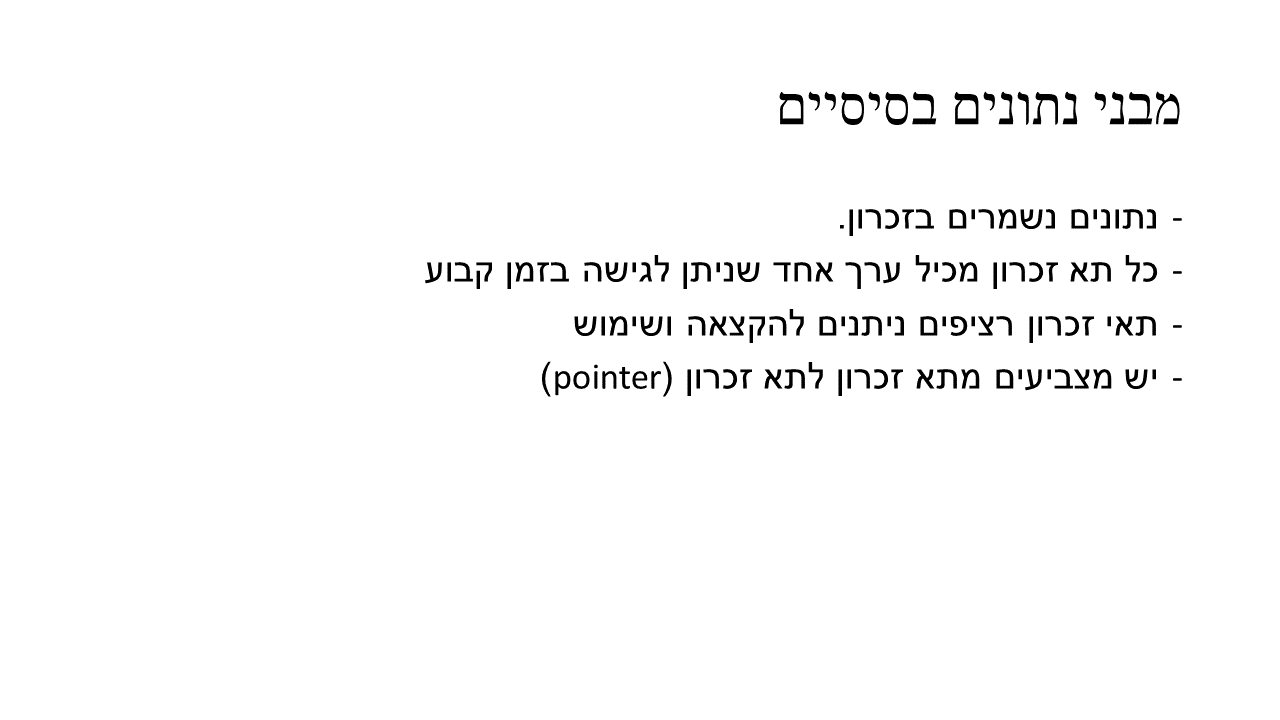

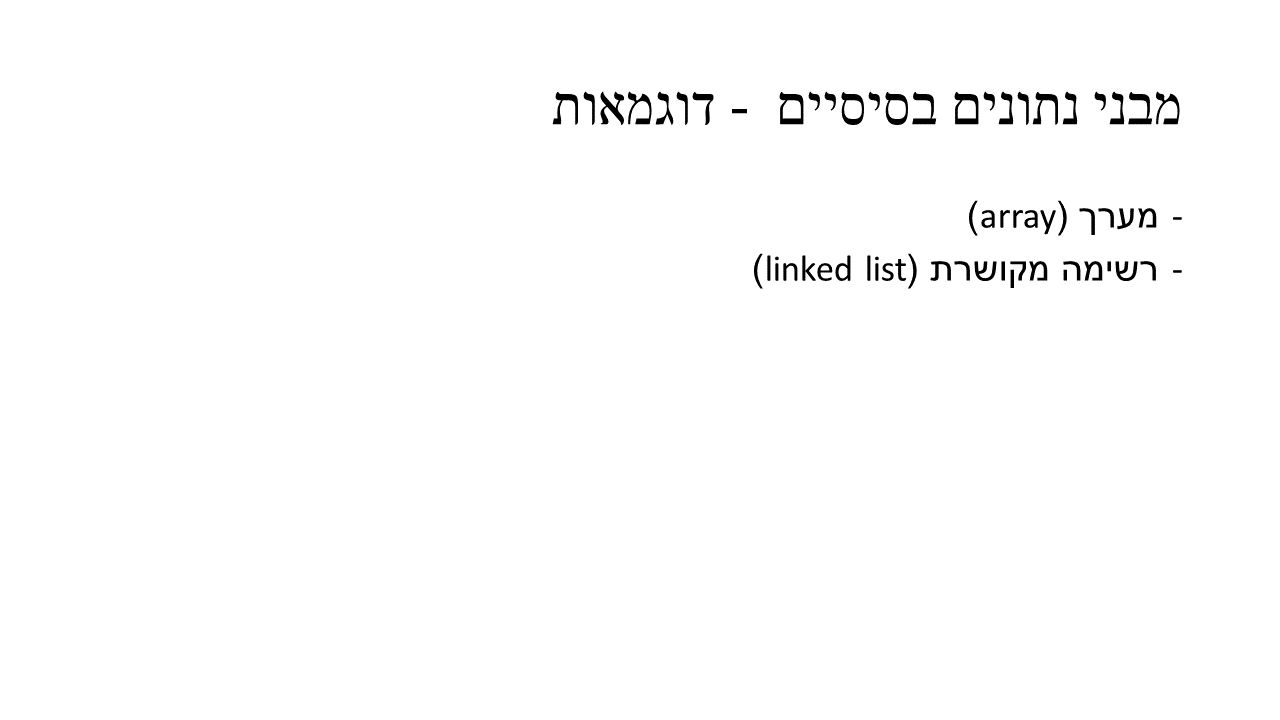

In [1]:
import numpy as np
import pandas as pd
import math
import graphviz 
from graphviz import nohtml

from IPython.display import display

In [3]:
ar = [1, 2, 3, 4, 5]
print(ar)

[1, 2, 3, 4, 5]


In [4]:
len(ar)

5

In [5]:
ar[3] = 7
print(ar)

[1, 2, 3, 7, 5]


## Linked List

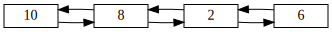

In [24]:
g = graphviz.Digraph('g', filename='btree.gv',
                     node_attr={'shape': 'record', 'height': '.1'})

g.graph_attr['rankdir'] = 'LR'
g.graph_attr['center'] = 'true'
#g.node('node0', nohtml('<f0> |<f1> 10| <f2>'))
#g.node('node1', nohtml('<f0> |<f1> 8| <f2>'))
#g.node('node2', nohtml('<f0> |<f1> 2| <f2>'))
#g.node('node3', nohtml('<f0> |<f1> 6| <f2>'))

g.node('node0', label='10')
g.node('node1', label='8')
g.node('node2', label='2')
g.node('node3', label='6')

g.edge('node0', 'node1')
g.edge('node1', 'node0')

g.edge('node1', 'node2')
g.edge('node2', 'node1')

g.edge('node2', 'node3')
g.edge('node3', 'node2')
# g.view()
display(g)

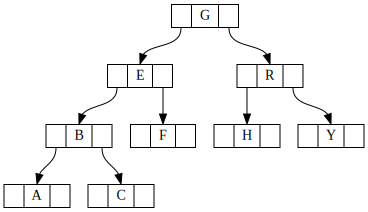

In [2]:
g = graphviz.Digraph('g', filename='btree.gv',
                     node_attr={'shape': 'record', 'height': '.1'})

g.node('node0', nohtml('<f0> |<f1> G|<f2>'))
g.node('node1', nohtml('<f0> |<f1> E|<f2>'))
g.node('node2', nohtml('<f0> |<f1> B|<f2>'))
g.node('node3', nohtml('<f0> |<f1> F|<f2>'))
g.node('node4', nohtml('<f0> |<f1> R|<f2>'))
g.node('node5', nohtml('<f0> |<f1> H|<f2>'))
g.node('node6', nohtml('<f0> |<f1> Y|<f2>'))
g.node('node7', nohtml('<f0> |<f1> A|<f2>'))
g.node('node8', nohtml('<f0> |<f1> C|<f2>'))

g.edge('node0:f2', 'node4:f1')
g.edge('node0:f0', 'node1:f1')
g.edge('node1:f0', 'node2:f1')
g.edge('node1:f2', 'node3:f1')
g.edge('node2:f2', 'node8:f1')
g.edge('node2:f0', 'node7:f1')
g.edge('node4:f2', 'node6:f1')
g.edge('node4:f0', 'node5:f1')

g.view()
display(g)